# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2
    + \sum_{i} \sum_{k} u_{ik}^2
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output.





1. Construct adjacency matrix with the given data, assuming its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br>
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric

<br>


<br>

<font color='red'> Reading the csv file </font>

In [81]:
import pandas as pd
data=pd.read_csv('/ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


<font color='red'>Create your adjacency matrix </font>

In [82]:
from scipy.sparse import csr_matrix
adjacency_matrix = csr_matrix((data.rating.values, (data.user_id.values,
                                               data.item_id.values)),)
adjacency_matrix.shape

(943, 1681)

<font color='red'> SVD decompostion</font>

In [84]:
from sklearn.utils.extmath import randomized_svd
import numpy as np

U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 5)
(5,)
(1681, 5)


<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [86]:
def initialize(dim):
  biased = np.zeros(dim)
    #'''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros
    # return output as a list of zeros



  return biased

b_i=initialize(943)
c_j=initialize(1681)

<font color='red'>Compute dL/db_i</font>

In [87]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
  db = alpha*b_i[user_id] -2*(rating - mu - b_i[user_id] - c_j[item_id] - np.dot(U[user_id], V.T[item_id]))
    #'''In this function, we will compute dL/db_i'''
  return db


<font color='red'>Compute dL/dc_j</font>

In [88]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha):
  dc = alpha*c_j[item_id] -2*(rating - mu - b_i[user_id] - c_j[item_id] - np.dot(U[user_id], V.T[item_id]))
    #'''In this function, we will compute dL/dc_j'''
  return dc


In [89]:
#Compute gradient w.r.to 'u'
def derivative_du(user_id,item_id,rating,U,V,mu, alpha):
  du = 2*alpha*U[user_id] -2*(rating - mu - b_i[user_id] - c_j[item_id] - np.dot(U[user_id], V.T[item_id]))*V.T[item_id]

  return du

In [90]:
#Compute gradient w.r.to 'v'
def derivative_dv(user_id,item_id,rating,U,V,mu, alpha):
  dv = 2*alpha*V.T[item_id] -2*(rating - mu - b_i[user_id] - c_j[item_id] - np.dot(U[user_id], V.T[item_id]))*U[user_id]

  return dv

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [91]:
# SVD decomposition
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=10,n_iter=5, random_state=24)

# Initialize parameters
alpha = 0.01
learning_rate=0.0001
epochs = 50
MSE = []
mu = data['rating'].mean()  # global mean rating


# Training
for i in range(epochs):

  # Vectorized updates for biases and latent factors
  for j , row in data.iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    rating = row['rating']
    db=derivative_db(user_id,item_id,rating,U1,V1,mu,alpha)
    dc=derivative_dc(user_id,item_id,rating,U1,V1,mu,alpha)

    b_i[user_id] =  b_i[user_id] - learning_rate * db
    c_j[item_id] =  c_j[item_id] - learning_rate * dc

    du=derivative_du(user_id,item_id,rating,U1,V1,mu,alpha)
    dv=derivative_dv(user_id,item_id,rating,U1,V1,mu,alpha)

    U1[user_id] =  U1[user_id] - learning_rate * du
    V1.T[item_id] =  V1.T[item_id] - learning_rate * dv

  sum = 0
  for j , row in data.iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    rating = row['rating']
    sum = sum + pow((rating-(mu+b_i[user_id]+c_j[item_id]+np.dot(U1[user_id], V1.T[item_id]))),2)

  avg = sum/data.shape[0]
  MSE.append(avg)


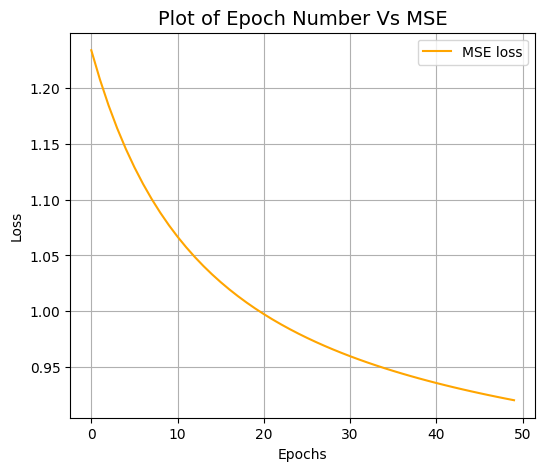

In [93]:
epoch = np.arange(50)
import matplotlib.pyplot as plt
plt.figure( figsize=(6,5))
plt.grid()
plt.plot(epoch,MSE,color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Plot of Epoch Number Vs MSE',fontsize = 14)
plt.legend(['MSE loss'])
plt.show()

##Checking if scaling user and item vector can improve metric loss

In [ ]:
from sklearn import preprocessing
#Normalize Data
U2 = preprocessing.normalize(U1)
V2 = preprocessing.normalize(V1.T)
V2 = V2.T
V2.shape

(10, 1681)

In [ ]:
alpha = 0.01
learning_rate=0.0001
epochs = 50
MSE = []
for i in range(epochs):
  for j , row in data.iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    rating = row['rating']
    db=derivative_db(user_id,item_id,rating,U2,V2,mu,alpha)
    dc=derivative_dc(user_id,item_id,rating,U2,V2,mu,alpha)

    b_i[user_id] =  b_i[user_id] - learning_rate * db
    c_j[item_id] =  c_j[item_id] - learning_rate * dc

    du=derivative_du(user_id,item_id,rating,U2,V2,mu,alpha)
    dv=derivative_dv(user_id,item_id,rating,U2,V2,mu,alpha)

    U2[user_id] =  U2[user_id] - learning_rate * du
    V2.T[item_id] =  V2.T[item_id] - learning_rate * dv

  sum = 0
  for j , row in data.iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    rating = row['rating']
    sum = sum + pow((rating-(mu+b_i[user_id]+c_j[item_id]+np.dot(U2[user_id], V2.T[item_id]))),2)

  avg = sum/data.shape[0]
  MSE.append(avg)


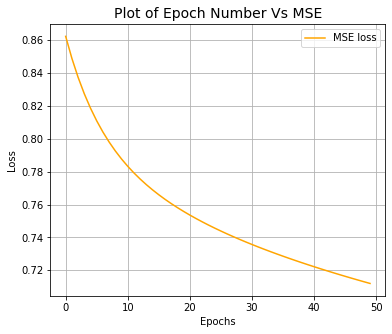

In [ ]:
epoch = np.arange(50)
import matplotlib.pyplot as plt
plt.figure( figsize=(6,5))
plt.grid()
plt.plot(epoch,MSE,color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Plot of Epoch Number Vs MSE',fontsize = 14)
plt.legend(['MSE loss'])
plt.show()

##Conclusion

metric loss is improving after scaling the user and item vector.

<font color='red'> Task 2</font>

In [79]:
import pandas as pd
data1=pd.read_csv('/user_info.csv.txt')
data1.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [80]:
X = U1
Y = data1['is_male']

In [ ]:
#Initialize weights
def initialize_weights(dim):
  w=np.zeros(dim)
  b=0
  return w,b

#Compute sigmoid
import math
def sigmoid(z):
  sig = 1/(1 + math.exp(-z))

  return sig

#Compute loss
def logloss(y_true,y_pred):
  n = len(y_true)
  loss = 0
  for i in range(n):
    loss +=  (y_true[i] *math.log(y_pred[i],10)) + (1-y_true[i])*math.log((1-y_pred[i]),10)
  log_loss = -loss/n
    #'''In this function, we will compute log loss '''

  return log_loss

#Compute gradient w.r.to 'w'
def gradient_dw(x,y,w,b,alpha,N):
  y1 = np.dot(w.T,x) + b
  sig = sigmoid(y1)
  dw = x*(y - sig) -(alpha/N)*w.T

  return dw

#Compute gradient w.r.to 'b'
def gradient_db(x,y,w,b):
  y1 = np.dot(w.T,x) + b
  sig = sigmoid(y1)

  db = y - sig
     #'''In this function, we will compute gradient w.r.to b '''
  return db


#Implementing logistic regression
def train(X_train,y_train,epochs,alpha,eta0):
  train_loss = list()
  w,b = initialize_weights(X.shape[1])
  N = X.shape[0]
  for i in range(epochs):
    for i in range(len(X_train)):
      dw = gradient_dw(X_train[i],y_train[i],w,b,alpha,N)
      db = gradient_db(X_train[i],y_train[i],w,b)
      w = w + eta0*dw
      b = b + eta0*db

    y_train_pred = []
    for i in range(len(X_train)):
      z = np.dot(w.T,X_train[i]) + b
      sig = sigmoid(z)
      y_train_pred.append(sig)
    train_loss.append(logloss(y_train,y_train_pred))

  return w,b,train_loss

In [ ]:
alpha=0.0001
eta0=0.0001
N=X.shape[0]
epochs=50
w,b,loss =train(X,Y,epochs,alpha,eta0)

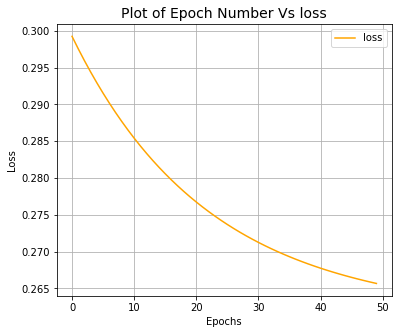

In [ ]:
epoch = np.arange(50)
import matplotlib.pyplot as plt
plt.figure( figsize=(6,5))
plt.grid()
plt.plot(epoch,loss,color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Plot of Epoch Number Vs loss',fontsize = 14)
plt.legend(['loss'])
plt.show()

In [ ]:
def pred(w,b, X):
    N = X.shape[0]
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)

In [ ]:
y_pred = pred(w,b, X)
y_pred[0:50]



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

##Conclusion

User feature related to ith row of user does not found to be true to predict whether the user is Male or Female.